In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("Employee.csv")

In [3]:
Data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
Data.shape

(4653, 9)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Dataset has four catagoerical columms & Five are numerical columns

## Data Set Details

Education - Education Level

JoiningYear - Year of Joining in Company

City - City Office Where posted

PaymentTier - Payment Tier  1: Highest Level  2: Mid Level  3: Lowest

Age - Current Age

Gender - Gender of Employee

EverBenched -  Ever kept out of projects for one month or more

ExperienceInCurrentDomain - Experienced in current field 

LeaveorNot - Whether employee leaves the company in next two years

## Checking the realationship 

<AxesSubplot:>

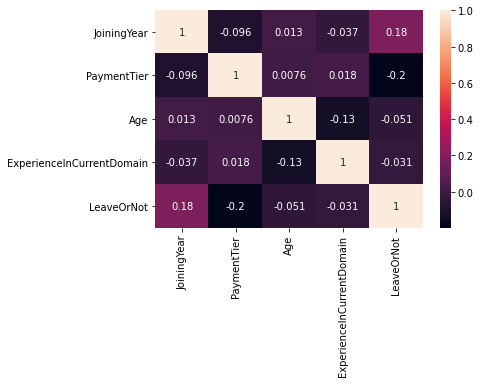

In [6]:
sns.heatmap(Data.corr(), annot = True)

### There is a good relation between (From the strongest to the weakest):

* JoiningYear & LeaveOrNot
* PaymentTier & ExperienceInCurrentDomain
* Age & JoiningYear
* PaymentTier & Age

### Statistical Analysis

In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


### Checking missing values

In [8]:
Data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

<AxesSubplot:>

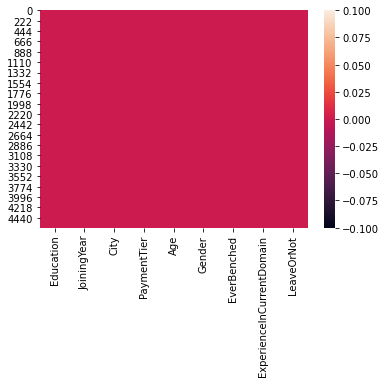

In [9]:
sns.heatmap(Data.isnull())

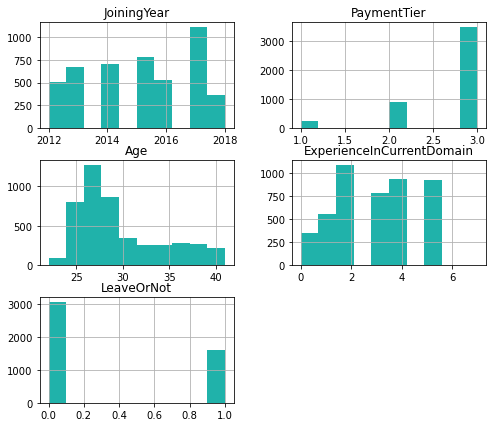

In [10]:
Data.hist(bins = 10 , figsize = (8,7)  , color= "LightSeaGreen")
plt.show()

In [11]:
Data['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [12]:
Edu = Data['Education'].value_counts()
Edu

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

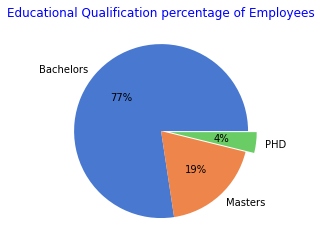

In [13]:
plt.title("Educational Qualification percentage of Employees",color='blue')
labels= ['Bachelors', 'Masters', 'PHD']
explode = [0, 0, 0.1,]
colors = sns.color_palette('muted')
plt.pie(Edu, labels=labels, colors = colors, explode=explode, autopct='%.0f%%')

plt.show()

Here, most of the employees have only bachelor degree.

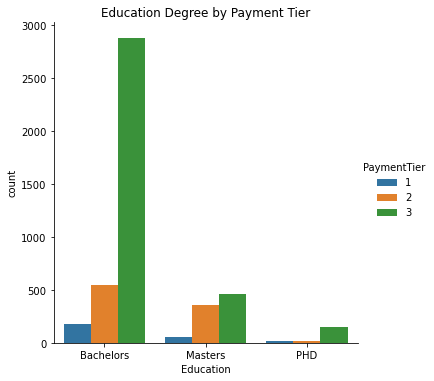

In [14]:
sns.catplot(data=Data,kind="count",x='Education',hue="PaymentTier").set(title='Education Degree by Payment Tier')

In [15]:
Data["Gender"].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

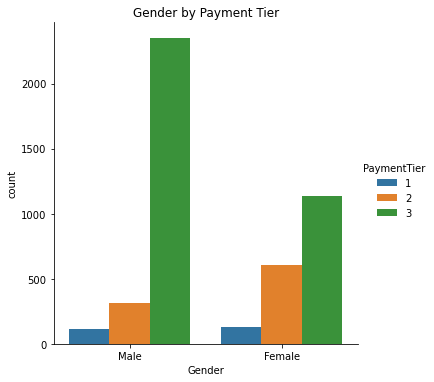

In [16]:
sns.catplot(data=Data,kind="count",x='Gender',hue="PaymentTier").set(title='Gender by Payment Tier')

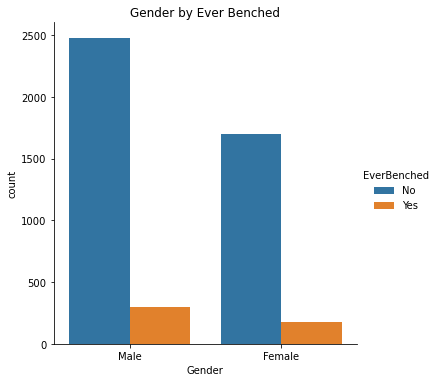

In [17]:
sns.catplot(data=Data,kind="count",x='Gender',hue="EverBenched", ).set(title='Gender by Ever Benched')

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

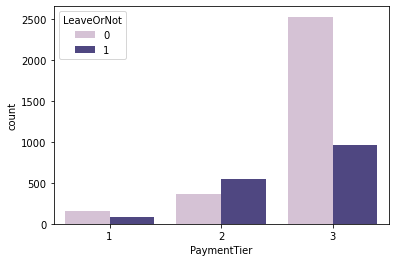

In [18]:
sns.countplot(data=Data, x='PaymentTier',hue='LeaveOrNot',palette = ['Thistle','DarkSlateBlue'])

Here, payment tier

* 1: Highest Level
* 2: Mid Level 
* 3: Lowest

It does not affect, because the higher the salary, the greater the number of employees who leave the company.I think this is because they found a better job opportunity or because there is a relationship,which is that the higher the salary, the more tasks, then the employee will leave the company because of the many tasks.

In [19]:
city=Data["City"].value_counts()
city

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

[Text(0.5, 1.0, 'Employee posted city count')]

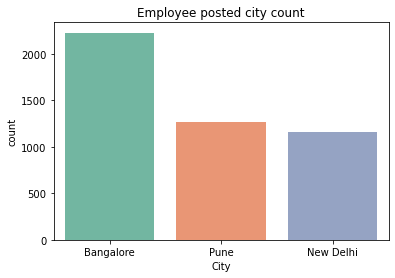

In [20]:
sns.countplot(data=Data, x='City',palette = 'Set2').set(title='Employee posted city count')

Bangalore is the most city which employees hired

In [21]:
JY = pd.DataFrame(Data.groupby(['JoiningYear' ])['JoiningYear'].count())
JY

,JoiningYear
JoiningYear,
2012,504
2013,669
2014,699
2015,781
2016,525
2017,1108
2018,367


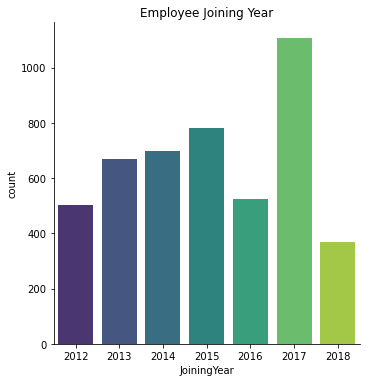

In [22]:
sns.catplot(data=Data,kind="count",x='JoiningYear', palette='viridis').set(title='Employee Joining Year')

2017 is the biggest year in hiring people, I think because this year the people were qualified enough and had enough experience to be appointed in the company, but we can increase the appointment from other years by giving them training periods that qualify them for the labor market and this will be in our interest in the end because we will get highly qualified employees

[Text(0.5, 1.0, 'Employee experience domain in leave or not')]

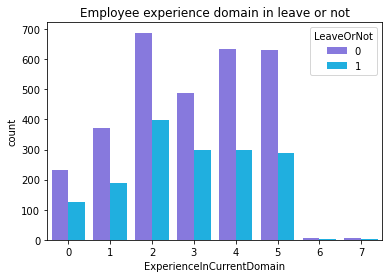

In [23]:
sns.countplot(data=Data,x="ExperienceInCurrentDomain",
              hue="LeaveOrNot", 
              palette = ['MediumSlateBlue',
                         'DeepSkyBlue']).set(title='Employee experience domain in leave or not')

[Text(0.5, 1.0, 'Age Distribution of employee')]

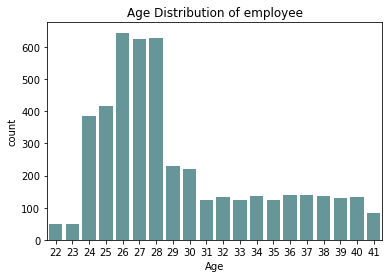

In [24]:
sns.countplot(data=Data,x="Age",  palette = ['CadetBlue']).set(title='Age Distribution of employee')

[1] https://seaborn.pydata.org/tutorial/color_palettes.html

[2] https://seaborn.pydata.org/generated/seaborn.catplot.html

## Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(Data.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        Data[name] = Le.fit_transform(Data[name])

In [30]:
Data.tail(7)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4646,0,2013,0,3,25,0,0,3,0
4647,0,2016,2,3,30,1,0,2,0
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0
4652,0,2015,0,3,33,1,1,4,0


In [33]:
Remaining_columns = list(Data.columns)
Remaining_columns.remove("LeaveOrNot")

In [34]:
X = Data[Remaining_columns].values 
Y = Data['LeaveOrNot'].values.astype(np.uint8)

## Modeling

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 4)

### Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model1 = LogisticRegression()
model1.fit(X_train , Y_train)
Y_pred=model1.predict(X_test)

Score1=model1.score(X_test , Y_test)
Score1

0.6829896907216495

In [37]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.79       747
           1       0.62      0.29      0.40       417

    accuracy                           0.68      1164
   macro avg       0.66      0.60      0.59      1164
weighted avg       0.67      0.68      0.65      1164



<AxesSubplot:>

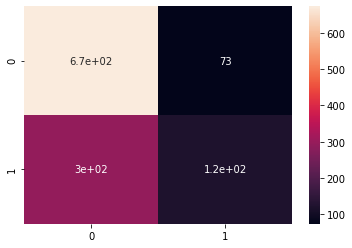

In [38]:
test_confusion_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(test_confusion_matrix, annot=True)

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier 

model2 = RandomForestClassifier()

model2.fit(X_train , Y_train)
Y_pred=model2.predict(X_test)

Score2=model2.score(X_test , Y_test)
Score2

0.8290378006872853

In [40]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       747
           1       0.81      0.68      0.74       417

    accuracy                           0.83      1164
   macro avg       0.82      0.80      0.81      1164
weighted avg       0.83      0.83      0.83      1164



<AxesSubplot:>

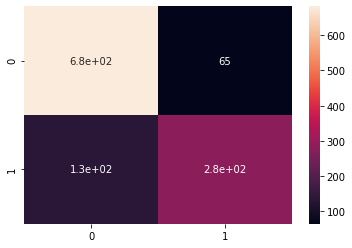

In [41]:
test_confusion_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(test_confusion_matrix, annot=True)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train , Y_train)
Y_pred=model3.predict(X_test)
Score3=model3.score(X_test , Y_test)
Score3

0.813573883161512

In [43]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       747
           1       0.77      0.69      0.73       417

    accuracy                           0.81      1164
   macro avg       0.80      0.79      0.79      1164
weighted avg       0.81      0.81      0.81      1164



<AxesSubplot:>

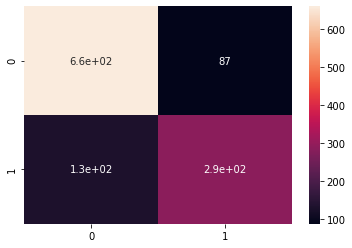

In [44]:
test_confusion_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(test_confusion_matrix, annot=True)

### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=6)
model4.fit(X_train , Y_train)
Y_pred=model4.predict(X_test)
Score4=model4.score(X_test , Y_test)
Score4

0.7860824742268041

In [52]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       747
           1       0.86      0.48      0.62       417

    accuracy                           0.79      1164
   macro avg       0.81      0.72      0.73      1164
weighted avg       0.80      0.79      0.77      1164



<AxesSubplot:>

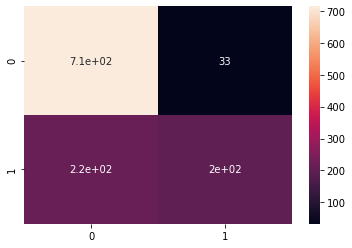

In [53]:
test_confusion_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(test_confusion_matrix, annot=True)

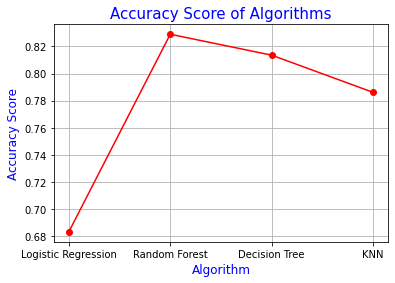

In [54]:
p= ["Logistic Regression", "Random Forest", "Decision Tree","KNN"]
q = [Score1,Score2,Score3,Score4]

plt.grid(True)
plt.title("Accuracy Score of Algorithms", fontsize=15, color="blue")
plt.xlabel("Algorithm",fontsize=12,color="blue")
plt.ylabel("Accuracy Score",fontsize=12,color="blue")
plt.plot(p,q,color='red', marker='o')